---
# Guía Autoestudio Clusterización KMeans

En esta guía, analizaremos los siguientes temas:
1. Eficiencia y costo computacional
2. Convergencia a un máximo local
3. Análisis efectividad en conjuntos anisotrópicos


**Qué es la clusterización K-Means**

Uno de los métodos de agrupamiento en clústeres más simples es el agrupamiento en clústeres **k-means**. Su objetivo es producir una agrupación que sea óptima en el siguiente sentido:

* el *centro de cada grupo* es el promedio de todos los puntos en el grupo
* cualquier punto de un grupo está más cerca de su centro que del centro de cualquier otro grupo

Al agrupamiento de k-medias se le da primero el número deseado de grupos, digamos k, como un *hiperparámetro*. A continuación, para iniciar el algoritmo, se eligen al azar k puntos del conjunto de datos como centros de conglomerados. Luego, las siguientes fases se repiten iterativamente:

* cualquier punto de datos está configurado para pertenecer a un clúster, cuyo centro está más cerca de él
* luego, para cada grupo, se elige un nuevo centro como el promedio de los puntos de datos en el grupo

Este procedimiento se repite hasta que los grupos ya no cambian. Este tipo de algoritmo se denomina algoritmo de maximización de expectativas (EM), que se sabe que converge.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Eficiencia y costo computacional

El algoritmo de k-means es uno de los algoritmos de clustering más populares debido a su simplicidad y eficiencia. Una de sus principales ventajas es que K-means es computacionalmente eficiente y puede manejar grandes conjuntos de datos de manera relativamente rápida. Es decir, K-means puede escalar bien con el tamaño del conjunto de datos, lo que significa que puede manejar conjuntos de datos grandes de manera eficiente. Esto lo hace adecuado para aplicaciones en las que se requiere rapidez en el procesamiento de datos.

**Complejidad Computacional de K-means**

La complejidad computacional de K-means depende de varios factores, incluido el número de iteraciones necesarias para converger y el tamaño del conjunto de datos. Aquí hay una descripción general de la complejidad computacional de K-means:

- **Inicialización de centroides**: La inicialización de los centroides puede tener una complejidad computacional de aproximadamente $O(k \times d \times n)$, donde k es el número de clústeres, d es la dimensión de los datos y n es el número de puntos de datos. Esto se debe a que se debe calcular la distancia entre cada punto de datos y cada centroide potencial durante la inicialización.

- **Asignación de puntos a clústeres**: Para cada punto de datos en el conjunto de datos, se calcula la distancia al centroide de cada clúster y se asigna al clúster más cercano. Esto tiene una complejidad computacional de aproximadamente $O(k \times n \times d)$, donde k es el número de clústeres, d es la dimensión de los datos y n es el número de puntos de datos.

- **Actualización de centroides**: Después de asignar todos los puntos de datos a los clústeres, se recalcula la posición de cada centroide como la media de los puntos de datos asignados a ese clúster. Esto tiene una complejidad computacional de aproximadamente $O(k \times d \times n)$, ya que se suman y promedian las coordenadas de cada punto de datos asignado a cada centroide.

- **Convergencia**: El algoritmo de K-means itera hasta que los centroides no cambian significativamente entre iteraciones o hasta que se alcanza un número máximo de iteraciones. La complejidad computacional de esta convergencia depende del número de iteraciones necesarias para converger, que puede variar según la inicialización de los centroides y la complejidad de los datos.

Ahora repetiremos la prueba que hicimos en la guía de clusterización jerárquica para evaluar la eficiencia computacional del algoritmo.

In [6]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage

In [8]:
# make_blobs retorna una tupla (puntos, centroide al que pertenece)
X1, y1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.8, random_state=101)
X2, y2 = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.8, random_state=101)
X3, y3 = make_blobs(n_samples=10000, n_features=2, centers=2, cluster_std=1.8, random_state=101)


La instrucción **%timeit** es una función mágica en IPython, un entorno interactivo de Python que proporciona características adicionales y mejoras sobre el intérprete de Python estándar. %timeit se utiliza para medir el tiempo de ejecución de una línea de código o una expresión en Python. Cuando utilizas **%timeit** seguido de una expresión o una línea de código, IPython ejecutará esa expresión múltiples veces y calculará el tiempo promedio que tarda en ejecutarse. Esto es útil para medir el rendimiento relativo de diferentes implementaciones de código o para evaluar el rendimiento de una operación específica.

In [ ]:
from sklearn.cluster import KMeans

# Entrenar K-Means sobre los tres tamaños de dataset y medir tiempo
print("Tiempo de entrenamiento para X1 (n=100):")
%timeit KMeans(n_clusters=2, random_state=42).fit(X1)

print("\nTiempo de entrenamiento para X2 (n=1.000):")
%timeit KMeans(n_clusters=2, random_state=42).fit(X2)

print("\nTiempo de entrenamiento para X3 (n=10.000):")
%timeit KMeans(n_clusters=2, random_state=42).fit(X3)

In [ ]:
# Entrenar un modelo sobre cada set de datos para visualizar los clusters
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(X1)
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(X2)
kmeans3 = KMeans(n_clusters=2, random_state=42).fit(X3)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X1[:, 0], X1[:, 1], c=kmeans1.labels_, cmap='viridis', s=20)
axes[0].set_title('X1 (n=100)')

axes[1].scatter(X2[:, 0], X2[:, 1], c=kmeans2.labels_, cmap='viridis', s=10)
axes[1].set_title('X2 (n=1.000)')

axes[2].scatter(X3[:, 0], X3[:, 1], c=kmeans3.labels_, cmap='viridis', s=5)
axes[2].set_title('X3 (n=10.000)')

for ax in axes:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [ ]:
# Comentario sobre los resultados de tiempo de ejecución
print("Al aumentar el número de muestras de 100 a 10.000,")
print("el tiempo de entrenamiento de K-Means crece, pero de forma")
print("bastante razonable considerando la cantidad de datos.")
print()
print("Esto muestra que K-Means es eficiente y escala bien, ")
print("por lo que es adecuado para conjuntos de datos grandes.")

## 2. Convergencia a un mínimo local

En el algoritmo de K-means, la convergencia a un mínimo local es un fenómeno en el que el algoritmo converge a una solución que es un mínimo local en lugar del óptimo global. Esto significa que el algoritmo encuentra una solución que es la mejor dentro de un vecindario local de puntos en el espacio de parámetros, pero no necesariamente la mejor solución en todo el espacio de parámetros.

**¿Por qué sucede esto con K-means?**

- **Naturaleza heurística del algoritmo**: El algoritmo de K-means es un algoritmo heurístico que no garantiza encontrar la mejor solución global. En cada iteración, el algoritmo actualiza los centroides y asigna puntos de datos a los clústeres basándose en reglas heurísticas. Estas reglas pueden conducir a soluciones subóptimas, especialmente en conjuntos de datos con formas de clústeres complicadas o con valores atípicos.

- **Dependencia del número de iteraciones**: El algoritmo de K-means converge cuando los centroides no cambian significativamente entre iteraciones o cuando se alcanza un número máximo de iteraciones. Si el número máximo de iteraciones es demasiado pequeño o si el criterio de parada es demasiado permisivo, el algoritmo puede converger prematuramente a un mínimo local.

- **Dependencia de la inicialización de los centroides**: El algoritmo de K-means puede ser sensible a la inicialización de los centroides. Si los centroides iniciales se eligen de manera subóptima, el algoritmo puede converger a un mínimo local en lugar del óptimo global. Esto puede ocurrir si los centroides iniciales están demasiado cerca o demasiado lejos de los verdaderos centroides de los clústeres.

**¿Cómo mitigar este problema?**

Para mitigar el riesgo de convergencia a mínimos locales, se pueden tomar varias medidas:

- **Inicialización múltiple de los centroides**: Ejecutar el algoritmo de K-means varias veces con diferentes inicializaciones de centroides y seleccionar la mejor solución basada en algún criterio, como la inercia (suma de las distancias cuadradas de los puntos al centroide más cercano).

- **Inicialización inteligente de los centroides**: Utilizar métodos de inicialización más sofisticados, como el algoritmo K-means++ que inicializa los centroides de manera que estén distribuidos de manera uniforme y alejados entre sí.

- **Aumento del número máximo de iteraciones**: Aumentar el número máximo de iteraciones para permitir que el algoritmo tenga más tiempo para explorar el espacio de soluciones y encontrar una solución mejor.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [12]:
# Generar un conjunto de datos sintético con clústeres que se superponen
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)


In [14]:
# Ejecutar K-means varias veces con diferentes inicializaciones de centroides
# note el parámetro init='random'
num_runs = 10
kmeans_results = []
for i in range(num_runs):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=i)
    kmeans.fit(X)
    kmeans_results.append(kmeans.labels_)


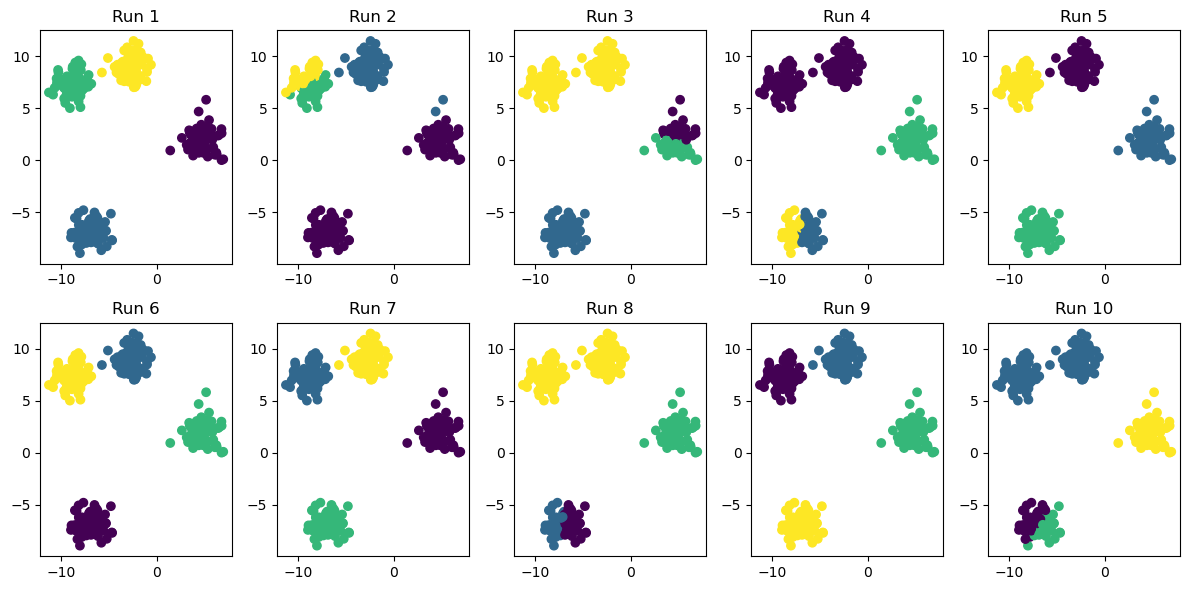

In [16]:
# Visualizar los resultados de las diferentes ejecuciones de K-means
plt.figure(figsize=(12, 6))
for i, labels in enumerate(kmeans_results):
    plt.subplot(2, 5, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'Run {i+1}')
plt.tight_layout()
plt.show()


In [ ]:
# ¿Qué se observa?
print("Con inicialización aleatoria (init='random') se obtienen")
print("particiones diferentes en cada corrida, aun con el mismo k.")
print("Esto evidencia que K-Means puede converger a distintos mínimos")
print("locales dependiendo de la posición inicial de los centroides.")

**Método de inicialización K-means++**

El método de inicialización KMeans++ es una técnica para inicializar los centroides en el algoritmo de KMeans de una manera más efectiva que la inicialización aleatoria estándar. Fue propuesto por David Arthur y Sergei Vassilvitskii en 2007 como una mejora sobre la inicialización aleatoria, con el objetivo de mejorar la convergencia y la calidad de los clústeres obtenidos por el algoritmo KMeans.

La idea principal detrás del método de inicialización KMeans++ es seleccionar los centroides iniciales de manera que estén más dispersos en el espacio de características y, por lo tanto, aumentar las posibilidades de converger a una solución mejor. El método consta de los siguientes pasos:

1. **Inicialización del primer centroide**: Se elige un punto de datos aleatorio del conjunto de datos como el primer centroide.

2. **Selección de los centroides restantes**: Para cada punto de datos restante, se calcula la distancia al centroide más cercano ya seleccionado. La probabilidad de seleccionar un punto de datos como el siguiente centroide es proporcional al cuadrado de la distancia mínima entre el punto de datos y el centroide más cercano. Esto significa que los puntos de datos que están más lejos de los centroides existentes tienen una mayor probabilidad de ser seleccionados como los siguientes centroides.

3. **Repetición del paso 2 hasta que se seleccionen todos los centroides**: Se repite el proceso de selección de centroides hasta que se han seleccionado todos los centroides requeridos para el algoritmo de KMeans.

La principal ventaja del método de inicialización KMeans++ es que ayuda a evitar la inicialización de los centroides en áreas densas del espacio de características, lo que puede conducir a una convergencia más rápida y a una mejor calidad de los clústeres finales. Esto puede ser especialmente útil en conjuntos de datos con formas de clústeres complicadas o con valores atípicos.


In [19]:
# Ejecutar K-means varias veces con el método de inicialización k-means++
# por defecto, éste es el método de inicialización
num_runs = 10
kmeans_results = []
for i in range(num_runs):
    kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1, random_state=i)
    kmeans.fit(X)
    kmeans_results.append(kmeans.labels_)


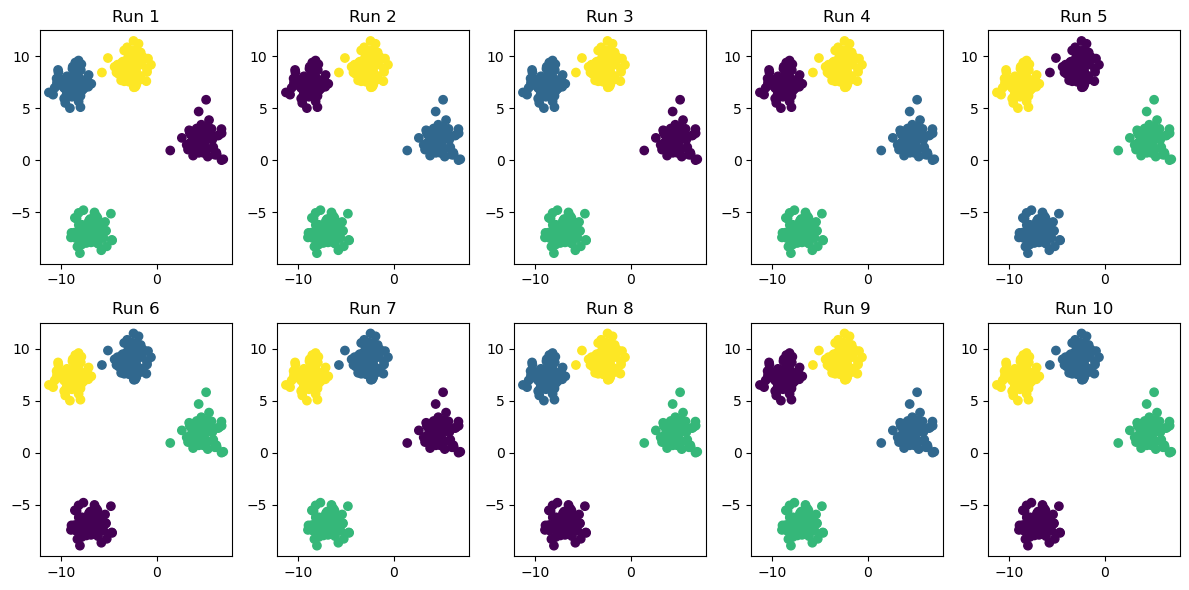

In [21]:
# Visualizar los resultados de las diferentes ejecuciones de K-means
plt.figure(figsize=(12, 6))
for i, labels in enumerate(kmeans_results):
    plt.subplot(2, 5, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'Run {i+1}')
plt.tight_layout()
plt.show()


In [ ]:
# ¿Qué se observa? ¿Qué se puede concluir al respecto?
print("Con inicialización k-means++ las distintas ejecuciones generan")
print("soluciones mucho más estables y similares entre sí.")
print("Este método reduce la probabilidad de caer en malos mínimos locales")
print("y mejora la calidad y consistencia de los clusters obtenidos.")

### 3. Análisis efectividad en conjuntos anisotrópicos

En conjuntos de datos anisotrópicos, donde la distribución de los puntos de datos no es uniforme en todas las direcciones, el algoritmo de K-means puede enfrentar algunos desafíos. La principal limitación de K-means en este tipo de conjuntos de datos es que asume que los clústeres son esféricos y de igual tamaño, lo que puede resultar en una agrupación deficiente si los clústeres tienen formas no esféricas o tamaños diferentes.

Sin embargo, K-means aún puede funcionar en conjuntos de datos anisotrópicos, especialmente si los clústeres tienen una estructura más o menos esférica y están bien separados. Aquí hay algunas consideraciones sobre cómo K-means puede comportarse en conjuntos de datos anisotrópicos:

- **Impacto de la forma y la orientación de los clústeres**: En conjuntos de datos anisotrópicos, los clústeres pueden tener formas y orientaciones no esféricas. Esto puede hacer que los centroides calculados por K-means estén sesgados hacia áreas de mayor densidad de puntos de datos, lo que puede afectar la calidad de los clústeres.

- **Sensibilidad a la métrica de distancia**: La elección de la métrica de distancia en K-means puede afectar cómo se agrupan los datos en conjuntos de datos anisotrópicos. Por ejemplo, si se utiliza la distancia euclidiana, que asume igual peso en todas las direcciones, K-means puede tener dificultades para capturar la estructura anisotrópica de los clústeres.

- **Escalamiento de características**: Escalar las características del conjunto de datos puede ayudar a mitigar los efectos de la anisotropía al igualar las escalas de las diferentes características. Esto puede ayudar a que K-means funcione mejor en conjuntos de datos anisotrópicos, ya que la distancia entre los puntos de datos se calcula de manera más equitativa en todas las direcciones.

- **Preprocesamiento de datos**: Realizar técnicas de preprocesamiento como PCA (Análisis de Componentes Principales) puede ayudar a reducir la dimensionalidad y capturar las direcciones principales de variación en el conjunto de datos. Esto puede hacer que K-means sea más efectivo al tratar con la anisotropía al reducir la influencia de las direcciones menos importantes.

In [23]:
from sklearn.datasets import make_moons

In [25]:
X,y = make_moons(200, noise=0.05, random_state=0)

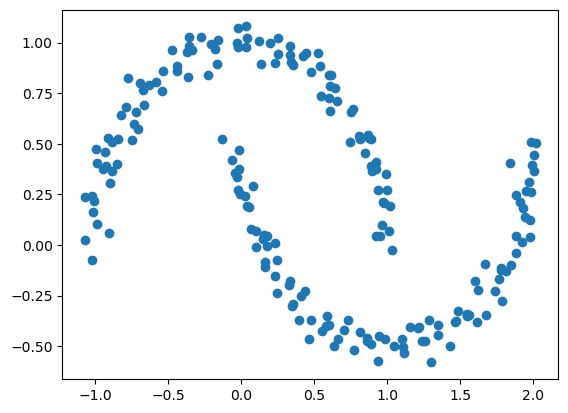

In [27]:
plt.scatter(X[:,0], X[:,1])

Ahora emplearemos la clusterización k-means para ver qué tan efectivo es en un conjunto de datos anisotrópico.

In [ ]:
# Realizar una clusterización K-Means sobre el set anisotrópico
from sklearn.cluster import KMeans

# probamos con k=2 (dos lunas) y también con k=3 para comparar
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(X)
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(X)

In [ ]:
# Visualizar la clusterización de K-Means sobre el set anisotrópico
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_2.labels_, cmap='viridis', s=20)
axes[0].set_title('K-Means con k=2')

axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_3.labels_, cmap='viridis', s=20)
axes[1].set_title('K-Means con k=3')

for ax in axes:
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

In [ ]:
# ¿Qué se puede concluir a partir de este análisis?
# ¿Cómo se desempeña el algoritmo de clusterización k-means en un set de datos anisotrópicos?
print("K-Means tiende a formar clusters aproximadamente esféricos y separados")
print("por fronteras lineales. En este dataset de dos lunas (no lineal),")
print("los clusters encontrados no siguen bien la forma real de los datos.")
print()
print("Esto muestra que en conjuntos anisotrópicos o con formas complejas,")
print("K-Means puede no ser la mejor opción y es preferible usar")
print("métodos capaces de capturar fronteras no lineales (por ejemplo,")
print("clustering espectral, DBSCAN u otros enfoques).")

---

## Resumen rápido K-Means
- Algoritmo de clustering basado en distancia que busca minimizar la suma de distancias cuadradas de los puntos a su centroide (inercia).
- Es muy eficiente computacionalmente y escala bien con muchos datos, por eso se usa como baseline en problemas de segmentación.
- Puede converger a **mínimos locales**: diferentes inicializaciones (especialmente aleatorias) pueden producir particiones distintas.
- Para mitigar lo anterior se usan varias reinicializaciones (`n_init`) y el método **k-means++**, que elige mejores centroides iniciales.
- Funciona bien cuando los clústeres son aproximadamente esféricos y de tamaño similar; en datos anisotrópicos o con formas complejas, otros métodos (p.ej. clustering espectral, DBSCAN) suelen funcionar mejor.